In [ ]:
Goal: 0.80861

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.base import BaseEstimator, TransformerMixin

In [21]:
import os
data_path = os.getcwd() + '\\data'
def load_passenger_data(file_name):
    csv_path = os.path.join(data_path, file_name)
    return pd.read_csv(csv_path)

In [23]:
train_df = load_passenger_data('train.csv')

In [24]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [ ]:
train_df['Cabin'].value_counts()

In [32]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
train_df[['Pclass','SibSp', 'Parch']].apply(pd.Series.value_counts)

,Pclass,SibSp,Parch
0,NaN,608.0,678.0
1,216.0,209.0,118.0
2,184.0,28.0,80.0
3,491.0,16.0,5.0
4,NaN,18.0,4.0
5,NaN,5.0,5.0
6,NaN,NaN,1.0
8,NaN,7.0,NaN


In [37]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
train_df.iloc[train_df['Fare'].idxmax]

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                          35
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                    512.329
Cabin                       NaN
Embarked                      C
Name: 258, dtype: object

In [56]:
train_df.sort_values(by='Fare', ascending=False, axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.00,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.00,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.00,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C


In [59]:
train_df.sort_values(by='Name', axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.00,0,0,C.A. 5547,7.5500,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.00,1,1,C.A. 2673,20.2500,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.00,1,1,C.A. 2673,20.2500,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.00,1,0,P/PP 3381,24.0000,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.00,1,0,P/PP 3381,24.0000,NaN,C
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.00,0,0,C 7076,7.2500,NaN,S
401,402,0,3,"Adams, Mr. John",male,26.00,0,0,341826,8.0500,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.00,1,0,7546,9.4750,NaN,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.00,0,1,392091,9.3500,NaN,S
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.00,0,0,2699,18.7875,NaN,C


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5FAEB0AC8>,
      dtype=object)

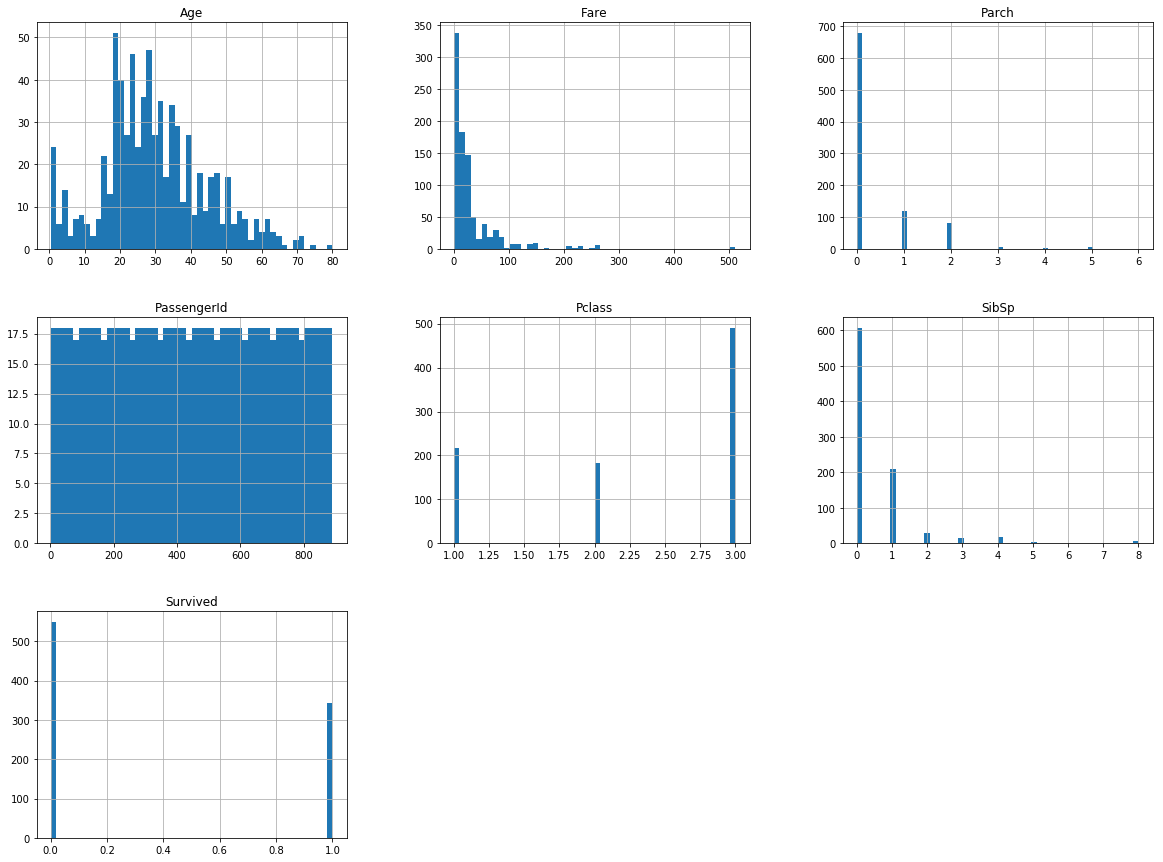

In [60]:
train_df.hist(bins=50, figsize=(20,15))

In [64]:
corr_matrix = train_df.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Survived", "Fare", "Parch", "Age",
              "Pclass"]
scatter_matrix(train_df[attributes], figsize=(12, 8))

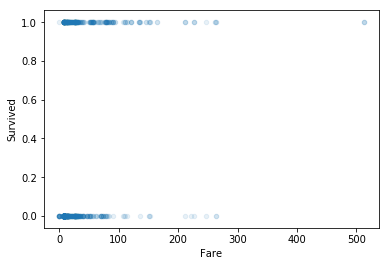

In [111]:
train_df.plot(kind="scatter", x="Fare", y="Survived",
             alpha=0.1)
#plt.axis([0, 16, 0, 550000])

In [132]:
survived_male = train_df[(train_df['Survived']==1) & (train_df['Sex']=='male')]
survived_male

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
74,75,1,3,"Bing, Mr. Lee",male,32.00,0,0,1601,56.4958,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C


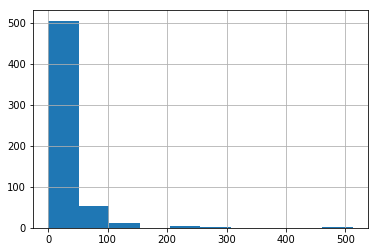

In [135]:
male = train_df[(train_df['Sex']=='male')]
male['Fare'].hist()

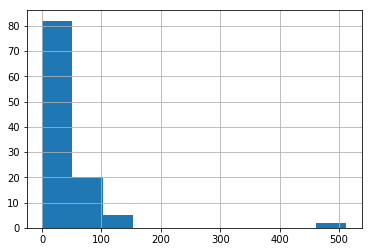

In [131]:
survived_male['Fare'].hist()

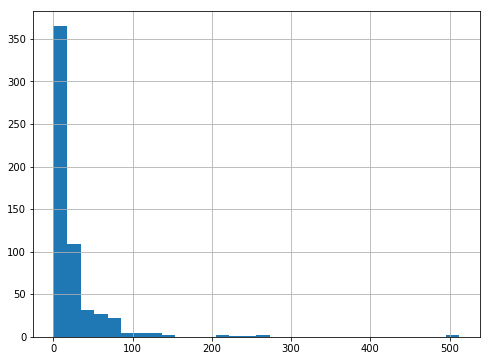

In [142]:
female = train_df[(train_df['Sex']=='female')]
male['Fare'].hist(bins=30, figsize=(8,6))

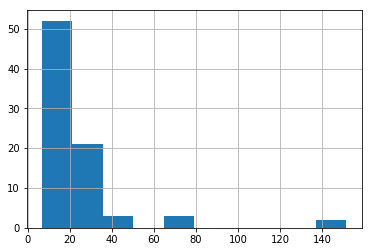

In [137]:
notsurvived_female = train_df[(train_df['Survived']==0) & (train_df['Sex']=='female')]
notsurvived_female['Fare'].hist()

In [97]:
def frequency_table(x):
    return pd.crosstab(train_df[x], train_df["Survived"], margins=True)

f_tabs = {}
for column in ['Pclass', 'Sex', 'Cabin', 'Embarked']:
    ctabs[column]=frequency_table(column)

In [117]:
ctabs['Sex']

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [94]:
def conditional_table(x):
    return pd.crosstab(train_df[x], train_df["Survived"], normalize='index', margins=True)

con_tabs = {}
for column in ['Pclass', 'Sex', 'Cabin', 'Embarked']:
    con_tabs[column]=conditional_table(column)

In [96]:
con_tabs['Sex']

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


In [143]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Prepare Data

In [144]:
train_df.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [426]:
train_labels = train_df['Survived'].copy()
train = train_df.drop('Survived', axis=1)
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [155]:
from sklearn.preprocessing import Imputer
num_imputer = Imputer(strategy="median")

In [428]:
train_num = train.select_dtypes(include=[np.number])

In [429]:
train_num.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [430]:
train_num_tr = num_imputer.fit_transform(train_num)

In [431]:
train_num_tr = pd.DataFrame(train_num_tr, columns=train_num.columns)
train_num_tr.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1.0,3.0,22.0,1.0,0.0,7.2500
1,2.0,1.0,38.0,1.0,0.0,71.2833
2,3.0,3.0,26.0,0.0,0.0,7.9250
3,4.0,1.0,35.0,1.0,0.0,53.1000
4,5.0,3.0,35.0,0.0,0.0,8.0500


In [260]:
class CategoricalFillerConst(BaseEstimator, TransformerMixin):
    def __init__(self, fill_value = 'Unknown', put_in_most_frequent = False): # no *args or **kargs
        self.fill_value = fill_value
        self.put_in_most_frequent = put_in_most_frequent
    def fit(self, X, y=None):
        self.most_frequent_values = {}
        for column in X.columns:
            self.most_frequent_values[column] = train_cat[column].value_counts().index[0]
        return self  # nothing else to do
    def transform(self, X, y=None):
        X_tr = X.copy()
        if self.put_in_most_frequent:
            for column in X_tr.columns:
                X_tr.loc[X_tr[column].isnull(), column] = self.most_frequent_values.get(column, 'Unknown')
            return X_tr
        else:
            for column in X_tr.columns:
                if column == 'Embarked':
                    X_tr.loc[X_tr[column].isnull(), column] = self.most_frequent_values.get(column, 'Unknown')
                else:
                    X_tr.loc[X_tr[column].isnull(), column] = self.fill_value
            return X_tr

In [261]:
cat_filler = CategoricalFillerConst()

In [432]:
train_cat_with_name_and_ticket = train.select_dtypes(include=[object])

In [389]:
train_cat = train_cat_with_name_and_ticket.drop(['Name', 'Ticket'], axis = 1)

In [435]:
train_cat.head()

,Sex,Cabin,Embarked
0,male,NaN,S
1,female,C85,C
2,female,NaN,S
3,female,C123,S
4,male,NaN,S


In [391]:
cat_filler.fit(train_cat)

CategoricalFillerConst(fill_value='Unknown', put_in_most_frequent=False)

In [392]:
train_cat[train_cat['Embarked'].isnull()]
train_cat[train_cat['Cabin'].isnull()].head()

,Sex,Cabin,Embarked
0,male,NaN,S
2,female,NaN,S
4,male,NaN,S
5,male,NaN,Q
7,male,NaN,S


In [393]:
train_cat_tr = cat_filler.transform(train_cat)

In [434]:
train_cat_tr.isnull().sum()

Sex         0
Cabin       0
Embarked    0
dtype: int64

In [395]:
train_cat_tr[train_cat['Embarked'].isnull()]
#train_cat_tr[train_cat['Cabin'].isnull()].head()

,Sex,Cabin,Embarked
61,female,B28,S
829,female,B28,S


Simplify Cabin feature for One Hot encoding: classify all cabins that appear only once as 'insignificant'.

In [401]:
train_cat_tr['Cabin'].value_counts().head(10)

Unknown          687
Insignificant    101
B96 B98            4
C23 C25 C27        4
G6                 4
D                  3
E101               3
F2                 3
F33                3
C22 C26            3
Name: Cabin, dtype: int64

In [380]:
class CategoricalColumnSimplifier(BaseEstimator, TransformerMixin):
    def __init__(self, columns, insignificance_threshold = 1): # no *args or **kargs
        self.insignificance_threshold = insignificance_threshold
        self.columns = columns
    def fit(self, X, y=None):
        self.insignificant_values = {}
        for column in self.columns:
            self.insignificant_values[column] = []
            for index, row in X.iterrows():
                if X[X[column] == X[column][index]].shape[0] <= self.insignificance_threshold:
                    self.insignificant_values[column].append(X[column][index])
        return self  # nothing else to do
    def transform(self, X, y=None):
        for column in self.columns:
            X.loc[X[column].isin(self.insignificant_values[column]), column] = 'Insignificant'
        return X

In [381]:
simplifier = CategoricalColumnSimplifier(columns = ['Cabin'])

In [396]:
simplifier.fit(train_cat_tr)

CategoricalColumnSimplifier(columns=['Cabin'], insignificance_threshold=1)

In [397]:
train_cat_tr_sig = simplifier.transform(train_cat_tr)

In [398]:
train_cat_tr_sig['Cabin'].value_counts().head(11)

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [399]:
train_cat_tr_sig.head(11)

,Sex,Cabin,Embarked
0,male,Unknown,S
1,female,Insignificant,C
2,female,Unknown,S
3,female,C123,S
4,male,Unknown,S
5,male,Unknown,Q
6,male,Insignificant,S
7,male,Unknown,S
8,female,Unknown,S
9,female,Unknown,C


In [403]:
from future_encoders import OrdinalEncoder

In [402]:
from future_encoders import OneHotEncoder

In [408]:
cat_encoder = OneHotEncoder()
train_cat_1hot = cat_encoder.fit_transform(train_cat_tr_sig)
train_cat_1hot

<891x53 sparse matrix of type '<class 'numpy.float64'>'
	with 2673 stored elements in Compressed Sparse Row format>

In [415]:
train_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [411]:
cat_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['B18', 'B20', 'B22', 'B28', 'B35', 'B49', 'B5', 'B51 B53 B55',
        'B57 B59 B63 B66', 'B58 B60', 'B77', 'B96 B98', 'C123', 'C124',
        'C125', 'C126', 'C2', 'C22 C26', 'C23 C25 C27', 'C52', 'C65',
        'C68', 'C78', 'C83', 'C92', 'C93', 'D', 'D17', 'D20', 'D26', 'D33',
        'D35', 'D36', 'E101', 'E121', 'E24', 'E25', 'E33', 'E44', 'E67',
        'E8', 'F G73', 'F2', 'F33', 'F4', 'G6', 'Insignificant', 'Unknown'],
       dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

Create pipelines

In [433]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

train_num_tr = num_pipeline.fit_transform(train_num)
train_num_tr[:5]

array([[-1.73010796,  0.82737724, -0.56573646,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.72622007, -1.56610693,  0.66386103,  0.43279337, -0.47367361,
         0.78684529],
       [-1.72233219,  0.82737724, -0.25833709, -0.4745452 , -0.47367361,
        -0.48885426],
       [-1.71844431, -1.56610693,  0.4333115 ,  0.43279337, -0.47367361,
         0.42073024],
       [-1.71455642,  0.82737724,  0.4333115 , -0.4745452 , -0.47367361,
        -0.48633742]])

In [439]:
cat_pipeline = Pipeline([
        ('nan_filler', CategoricalFillerConst()),
        ('simplifier', CategoricalColumnSimplifier(columns = ['Cabin'])),
        ('onehot', OneHotEncoder()),
    ])

train_cat_tr = cat_pipeline.fit_transform(train_cat)
train_cat_tr.toarray()[:3]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 1.]])

In [418]:
from future_encoders import ColumnTransformer

In [440]:
num_attribs = list(train_num)
cat_attribs = ["Sex", 'Cabin', 'Embarked']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

train_prepared = full_pipeline.fit_transform(train)

# Select and train your model

# Fine-tune your model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'cat__simplifier__insignificance_threshold': [0,1,2], 'cat__nan_filler__put_in_most_frequent': [False,True], 'num__imputer__strategy' : ['median', 'mean', 'most_frequent']},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]